<a href="https://colab.research.google.com/github/Ricardomanuel1/Maestria_Ciencia_de_Datos/blob/main/III.%20Matematica_Ciencia_Datos/SESION_02_MCD_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://drive.google.com/uc?export=view&id=1ixeSQe4-IjSpN6IqL8Ae3fMU9sxUGJIu" width="1200">



### <center> $Sistema \ de \ Ecuaciones \ lineales$

**Sesión de Laboratorio 02 :** Solución de sistemas de ecuaciones lineales descomposicion matricial

**Profesor:** Sergio Moisés Aquise Escobedo

**Estudiante de Posgrado** .........................................

---

# **Nociones básicas de Algebra lineal**

# **Multiplicacion de matrices**



**Ejemplo:** Sean las matrices


$
A=\left[\begin{array}{lcr}
1 & 3 & 5\\
4 & 1 & 7
\end{array}\right]
$

$
B=\left[\begin{array}{lcr}
1 & 5 & 8\\
4 & 1 & 1\\
2 & 0 & 2
\end{array}\right]
$

Hallar $AB$

In [ ]:
import numpy as np

In [ ]:
A=np.array([[1,3,5],[4,1,7]])
B=np.array([[1,5,8],[4,1,1],[2,0,2]])

In [ ]:
C=np.dot(A,B)
print(C)

[[23  8 21]
 [22 21 47]]


**Ejemplo:** Sean las matrices

$
A=\left[\begin{array}{lcr}
19 & 20\\
12 & 11
\end{array}\right]
$

$
B=\left[\begin{array}{lcr}
20\\
9
\end{array}\right]
$

Hallar $AB$

In [ ]:
A=np.array([[19,20],[12,11]])
B=np.array([[20],[9]])

In [ ]:
C=np.dot(A,B)
print(C)

[[560]
 [339]]


### **Matriz transpuesta**

 **Ejemplo:** Hallar la transpuesta de la matriz

 $
A=\left[\begin{array}{lcr}
23 & 8 & 21\\
22 & 21 & 47
\end{array}\right]
$

In [ ]:
A=np.array([[23,8,21],[22,21,47]])
print('Matriz A')
print(A)
D=np.transpose(A)
print('Matriz transpuesta de A')
print(D)

Matriz A
[[23  8 21]
 [22 21 47]]
Matriz transpuesta de A
[[23 22]
 [ 8 21]
 [21 47]]


---

## **Descomposición matricial**

## **La descomposición LU**

Si $A$ es de orden $n$  tal que $det⁡(A_k )≠0$,  $∀k=1,2,…,n-1$ , existen $L$ matriz triangular inferior con diagonal $1$ y $U$ triangular superior únicas tal que


$$A=LU$$


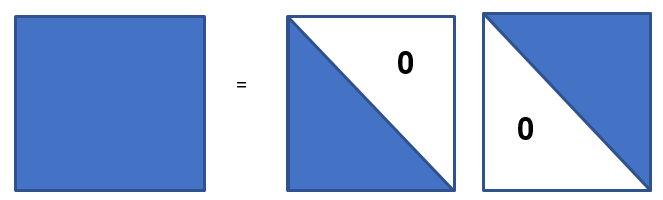

In [ ]:
%%% Pivoteo sin intercambios
%A=[2 6 10;3 12 24;4 16 31]
A=[1 2 1;2 5 5;3 7 8]
n=length(A);
Ai=A;
AA=A;
I=eye(n);MMi=I;
for i=1:n-1
    mi=zeros(n,1);
    for k=1+i:n
      mi(k)=-AA(k,i)/AA(i,i);
    endfor
    ei=I(:,i);
    Mi=I+mi*ei',Ai=Mi*AA,MMi=Mi*MMi;AA=Ai;
endfor
U=MMi*A;L=inv(MMi);
LU=L*U
L=round(L),U=round(U)



In [ ]:
%% Pivoteo parcial
A=[2 6 10;3 12 24;4 16 31]
n=length(A);
Ai=A;
AA=A;
I=eye(n);MMi=I;pp=I;%M=I;
for i=1:n-1
    %%%%%%%%%%%%%%%%%
    indice=find(AA(:,i)=max(abs(AA(i:n,i))));indice=min(indice)
    P=I;
    xx=P(i,:);P(i,:)=P(indice,:);P(indice,:)=xx;P
    AA=P*AA
    %%%%%%%%%%%%%%%%%
    mi=zeros(n,1);
    for k=1+i:n
      mi(k)=-AA(k,i)/AA(i,i);
    endfor
    ei=I(:,i);
    Mi=I+mi*ei',MMi=(Mi*P)*MMi,Ai=(MMi)*A
    AA=Ai; pp=P*pp;
endfor

%%%U=MMi*A;L=inv(MMi);

U=MMi*A;
LL=inv(MMi)
L=pp*inv(MMi);

LU=pp'*L*U
L=round(L);U=round(U);

%U=MMi*A,L=inv(MMi),lu=L*U

## **Sutitucion regresiva**

In [ ]:
function z=sr(A)
n=length(A)-1;x=zeros(n,1);
x(n)=A(n,n+1)/A(n,n);
for i=n-1:-1:1
    s=0;
    for j=i+1:n
        s=s+A(i,j)*x(j);
    end
    x(i)=(A(i,n+1)-s)/A(i,i);
end
z=x;

## **Sustitución hacia adelante**

In [ ]:
function z=sust_ADELANTE(A)
n=length(A)-1;y=zeros(n,1);
y(1)=A(1,n+1)/A(1,1);
for i=2:n
    s=0;
    for j=1:n-1
        s=s+A(i,j)*y(j);
    end
    y(i)=(A(i,n+1)-s)/A(i,i);
end
z=y;

In [ ]:
A=[1 2 1;2 5 5;3 7 8]
b=[3;7;12]
A0=[A b]
[L1,U1]=LU1(A)
A1=[L1 b]
Y=sust_ADELANTE(A1)
A2=[U1 Y]
X=sr(A2)

## **Solución de un sistema de ecuaciones usando la descomposicion LU**

$Ax=b \Leftrightarrow LY=b \ \wedge \ UX=Y$

## **La descomposición QR**

Toda matriz que tiene rank máximo puede ser descompuesta en el producto

$$A=QR$$

Donde $Q$ es una matriz unitaria y $R$ es  triangular superior


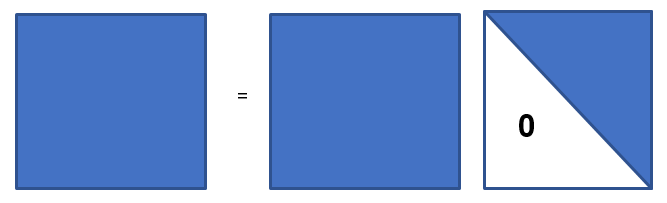

## **Solución de un sistema de ecuaciones usando la descomposicion QR**

$Ax=b \Leftrightarrow RX=Q^tb $

In [ ]:
function [Q,R,QR]=DesQR(A)
n=length(A);
Ai=A;
Q=eye(n);
for i=1:n-1
    j=0;
    x=[];
    for k=i:n
        j=j+1;
        x(j)=Ai(k,i);
    end
    xi=x'
    [Hi,U]=matrizHC(x');
    Hsigma=Hi*xi
    for m=length(Hi)+1:n
    z=cat(2,zeros(length(Hi),1),Hi);
    I=eye(m);
    Hi=cat(1,I(1,:),z);
    end
    Hi   ;
    Ai=Hi*Ai;
    Q=Q*Hi
    R=Q'*A;
end
Q;R;
QR=Q*R;

---

**Trabajo encargado**

1. Usando el programa para hallar la descomposición $QR$ mediante el algoritmo de Gram Schmidt, obtenga la descomposición $QR$ de la matriz $H$ donde

$$h_{ij}=\frac{1}{i+j-1}   \    i,j=1,2,….,n$$

>Calcule $QQ^t$ y compare con la matriz identidad analice lo que puede observar. Utilice $n=10$


2. 	Un algoritmo alternativo al método de Gram Schmidt es el método de Gram Schmidt modificado que es obtenido de la siguiente forma: dada la base $a_1,a_2,…,a_n$ calculamos
$q ̃_1=a_1/‖a_1 ‖_2$

>En el paso k del algoritmo modificamos el cálculo de $q_{k+1}$ de la siguiente manera

$$a_{k+1}^{(1)}=a_{k+1}-〈q ̃_1,a_{k+1}〉q ̃_1\\
a_{k+1}^{(2)}=a_{k+1}^{(1)}-〈q ̃_2,a_{k+1}^{(1)}〉 q ̃_2\\
a_{k+1}^{(k)}=a_{k+1}^{(k-1)}-〈q ̃_k,a_{k+1}^{(k)} 〉 q ̃_k
$$

>Pruebe que

$$a_{k+1}^{(k)}=q_{k+1}\\
q ̃_{k+1}=\frac{a_{k+1}^{(k)}}{‖a_{k+1}^{(k)} ‖_2}$$





>Implemente el algoritmo de método de Gram Schmidt modificado y repita el ejercicio (1)